<a href="https://colab.research.google.com/github/ValdazoAmerico/desequilibio-de-clases-con-smote/blob/main/ML-Python-SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Manejando desequilibrio de clases con Python y SMOTE

In [3]:
import pandas as pd

In [32]:
len(names)

31

In [34]:
names = ['a', 'b', 'c', 'axb', 'bnfdfgfd', 'asdasdc', 'af', 'bghgh', 'cghghdhd', 'afdg', 'bas35', 'c8', 'a5', 'bfg56', 'c234234234', 'a65656', 'v565b', 'drvc', 'adhb', 'sdvb', '457c', '324234a', '745754a', '457457b', '457457c', 'a13223213', 'vsdvb', 'c35b', 'perro', 'gato', 'fraude']

In [35]:
df = pd.read_csv('creditcard.csv', names=names)

In [37]:
df.head()

,a,b,c,axb,bnfdfgfd,asdasdc,af,bghgh,cghghdhd,afdg,bas35,c8,a5,bfg56,c234234234,a65656,v565b,drvc,adhb,sdvb,457c,324234a,745754a,457457b,457457c,a13223213,vsdvb,c35b,perro,gato,fraude
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
df['fraude'].value_counts()

0    284315
1       492
Name: fraude, dtype: int64

In [39]:
import matplotlib.pyplot as plt


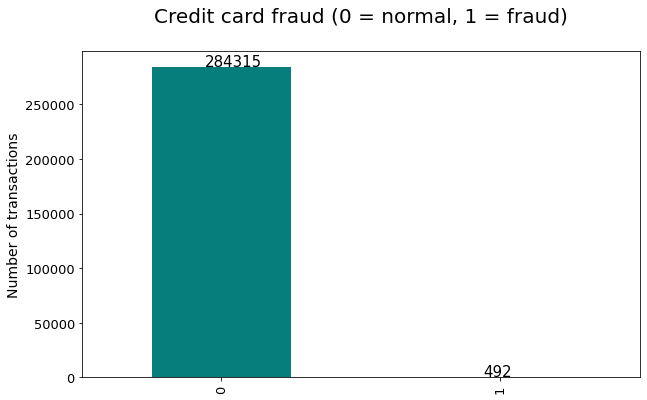

In [40]:
ax = df['fraude'].value_counts().plot(kind='bar', figsize=(10,6), fontsize=13, color='#057E7C')
ax.set_title('Credit card fraud (0 = normal, 1 = fraud)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
  ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [42]:
merged = df

In [43]:
from sklearn.preprocessing import MinMaxScaler

to_scale = [col for col in df.columns if df[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(merged[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

for col in scaled:
  merged[col] = scaled[col]

merged.head()

,a,b,c,axb,bnfdfgfd,asdasdc,af,bghgh,cghghdhd,afdg,bas35,c8,a5,bfg56,c234234234,a65656,v565b,drvc,adhb,sdvb,457c,324234a,745754a,457457b,457457c,a13223213,vsdvb,c35b,perro,gato,fraude
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [45]:
from sklearn.model_selection import train_test_split
import numpy as np

X = merged.drop('fraude', axis=1)
y = merged['fraude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'''% positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
      % positive class in Test = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


% positive class in Train = 0.18
      % positive class in Test = 0.16


Accuracy =  1.00
Recall = 0.79



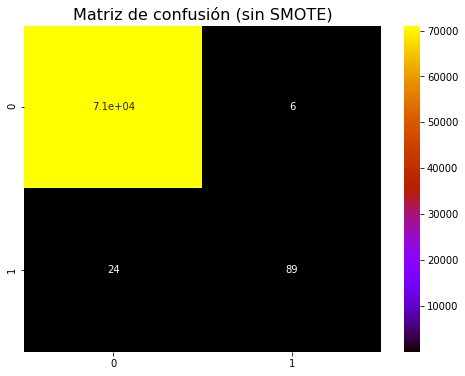

In [46]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds): .2f}\nRecall = {recall_score(y_test,preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8,6))
plt.title('Matriz de confusión (sin SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='gnuplot')

In [ ]:
pip install imbalanced-learn

In [51]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Cambio de X antes de SMOTE: {X.shape}
      Cambio de X despuès SMOTE: {X_sm.shape}''')

print('\nBalance positivo y negarivo de las clases (%):')

yf = pd.DataFrame ({'values': y_sm })

yf['values'].value_counts(normalize=True)*100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Cambio de X antes de SMOTE: (284807, 30)
      Cambio de X despuès SMOTE: (568630, 30)

Balance positivo y negarivo de las clases (%):


1    50.0
0    50.0
Name: values, dtype: float64

Accuracy =  1.00
Recall = 1.00



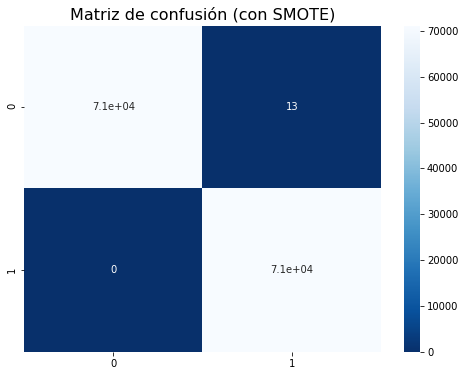

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds): .2f}\nRecall = {recall_score(y_test,preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8,6))
plt.title('Matriz de confusión (con SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues_r')